In [18]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly
!pip install yfinance


In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [16]:
import yfinance as yf
# Download historical data for a TESLA stock
tsla = yf.Ticker("TSLA")
tsla_data = tsla.history(period="max")
tsla_data.reset_index(inplace=True)
tsla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [12]:
# Get data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text

# Parse HTML data
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table
table = soup.find_all("tbody")[1]

# Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Iterate through each row in table
for row in table.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
    tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Clean the data
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 rows
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [17]:
# import yfinance as yf
# Download historical data for a GameStop Corp. (GME) stock
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [14]:
# Get data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data2  = requests.get(url).text

# Parse HTML data
soup = BeautifulSoup(html_data2, 'html.parser')

# Find the table
table = soup.find_all("tbody")[1]

# Create an empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Iterate through each row in table
for row in table.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
    gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

# Clean the data
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# last 5 rows
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


Question 5: Plot Tesla Stock Graph
Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.
Upload a screenshot of your results.

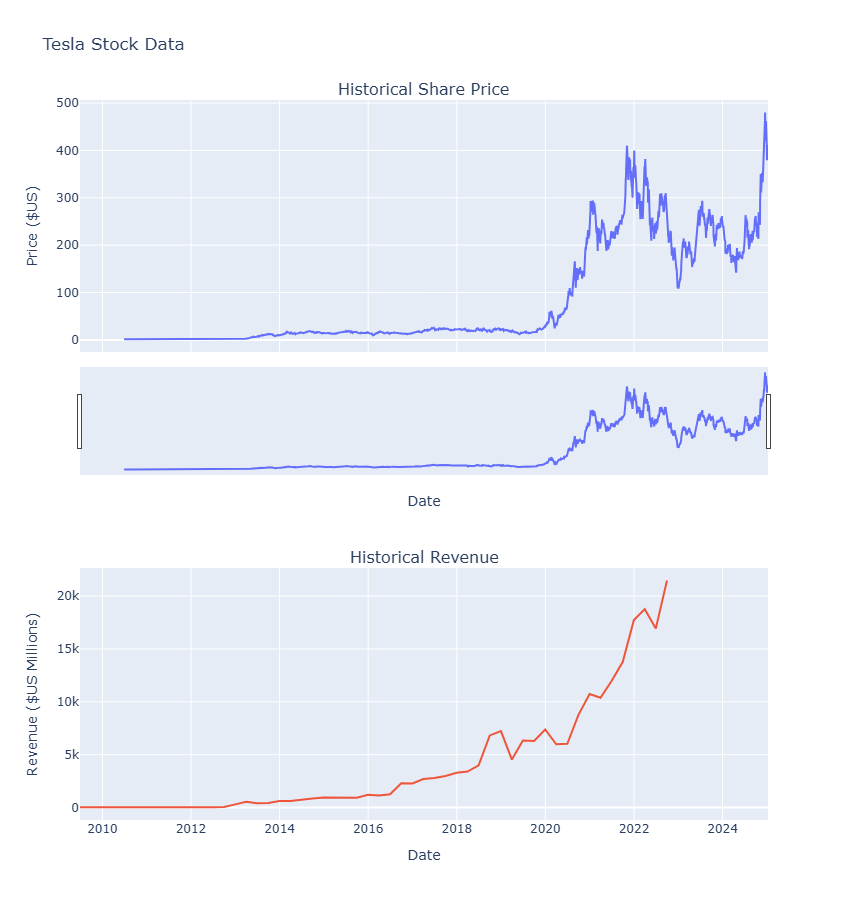

In [25]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extract Tesla Revenue Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with Tesla revenue data (second table in the page)
table = soup.find_all("tbody")[1]

# Create an empty DataFrame for Tesla revenue data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

#Iterate through each row in table
for row in table.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
    tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)


# Clean the 'Revenue' column by removing commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Print the first few rows of the Tesla revenue data to verify
#print(tesla_revenue.head())

# Step 2: Download Tesla Stock Data
# Creating an object using the Ticker module with the ticker symbol 'TSLA' for Tesla.
Tesla = yf.Ticker("TSLA")

# Fetching the historical market data for Tesla
tesla_data = Tesla.history(period="max")  # Fetches the historical data for Tesla

# Reset the index
tesla_data.reset_index(inplace=True)

# Ensure the 'Date' column is in string format to match the revenue data format
# tesla_data['Date'] = tesla_data['Date'].astype(str)

# Display the first five rows
# print(tesla_data.head())


# Question 5: Plot Tesla Stock Graph
# Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.
# Upload a screenshot of your results.

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data')

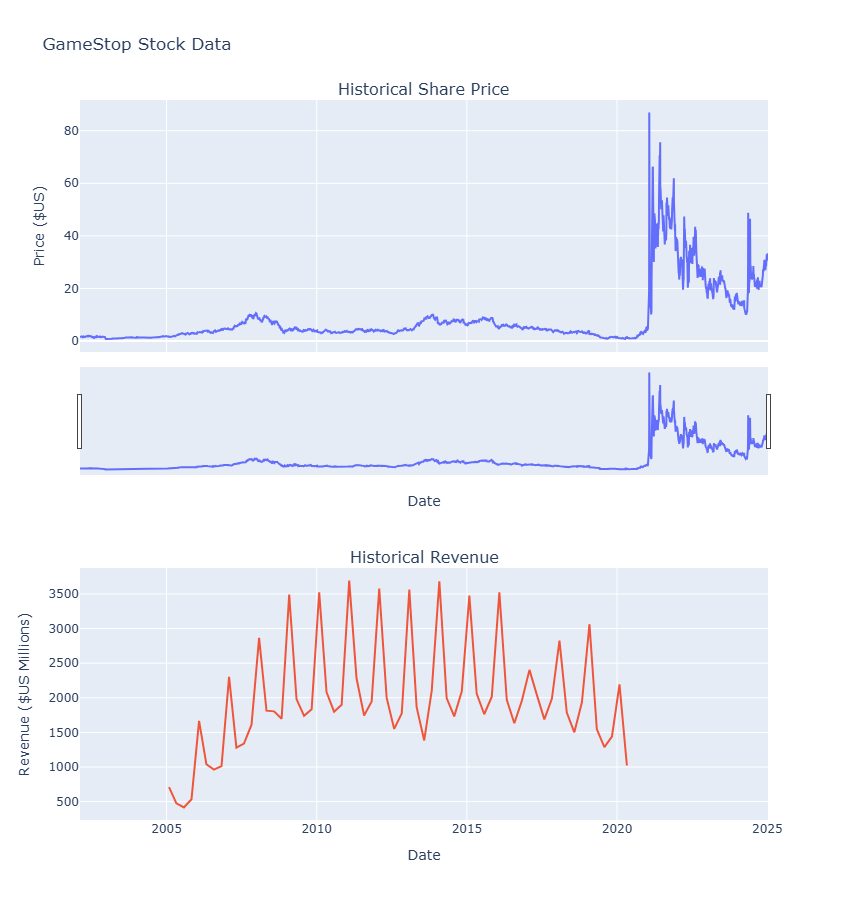

In [27]:
# Question 6: Plot GameStop Stock Graph
#
# Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.
# Upload a screenshot of your results.

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    
make_graph(gme_data,gme_revenue,"GameStop Stock Data")